In [29]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')



In [30]:
# Files to Load
mouse_csv = "data/mouse_drug_data.csv"
clinical_csv = "data/clinicaltrial_data.csv"

In [31]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_csv)
clinical_data = pd.read_csv(clinical_csv)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [13]:
# Combine the data into a single dataset
data_merge = pd.merge(mouse_data, clinical_data, how="inner", on="Mouse ID")
data_merge.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [15]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_sort = data_merge.groupby(['Drug'])['Drug'].unique()
data_merge_by_drug = data_merge.groupby(['Drug','Timepoint']).mean()

In [18]:
#Store data into a pivot table 
drug_pivot = pd.pivot_table(data_merge, values=['Tumor Volume (mm3)'], index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
# Preview DataFrame
drug_pivot.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [46]:
# Calculate standard error
std_error_cap = list(drug_pivot['Tumor Volume (mm3)']['Capomulin'].values)
sec = statistics.stdev(std_error)

std_err_inf = list(drug_pivot['Tumor Volume (mm3)']['Infubinol'].values)
sei = statistics.stdev(std_err_inf)

std_err_ket = list(drug_pivot['Tumor Volume (mm3)']['Ketapril'].values)
sek = statistics.stdev(std_err_ket)

std_err_plac = list(drug_pivot['Tumor Volume (mm3)']['Placebo'].values)
sep = statistics.stdev(std_err_plac)

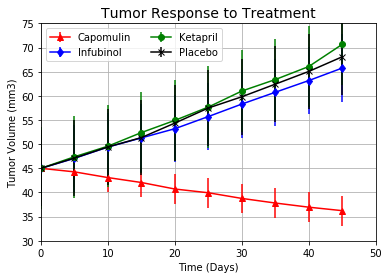

In [47]:
# Create Tumor response scatter plot.

y_axis = list(drug_pivot['Tumor Volume (mm3)']['Capomulin'].values)
x_axis = list(drug_pivot['Tumor Volume (mm3)']['Capomulin'].index)
Capomulin = plt.errorbar(x_axis,  y_axis, yerr=sec, marker="^", color='red', alpha=1.0)


y_axis = list(drug_pivot['Tumor Volume (mm3)']['Infubinol'].values)
x_axis = list(drug_pivot['Tumor Volume (mm3)']['Infubinol'].index)
Infubinol = plt.errorbar(x_axis,  y_axis, yerr=sei, marker="d",  color='blue', alpha=1.0)


y_axis = list(drug_pivot['Tumor Volume (mm3)']['Ketapril'].values)
x_axis = list(drug_pivot['Tumor Volume (mm3)']['Ketapril'].index)
Ketapril = plt.errorbar(x_axis,  y_axis, yerr=sek, marker="o",  color='green', alpha=1.0)


y_axis = list(drug_pivot['Tumor Volume (mm3)']['Placebo'].values)
x_axis = list(drug_pivot['Tumor Volume (mm3)']['Placebo'].index)
Placebo = plt.errorbar(x_axis,  y_axis, yerr=sep, marker="x",  color='black', alpha=1.0)


plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'),
           scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=10)



plt.xlabel("Time (Days)", fontsize=10, color='black')
plt.ylabel("Tumor Volume (mm3)", fontsize=10, color='black')
plt.title("Tumor Response to Treatment", fontsize=14, color='black')
plt.grid()

      
plt.ylim(30, 75.0)
plt.xlim(0, 50.0)
plt.show()


## Metastatic Response to Treatment

In [20]:
# Create metastatic pivot table.
metastatic_pivot = pd.pivot_table(data_merge, values=['Metastatic Sites'], index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
# Preview the data frame
metastatic_pivot.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [43]:
# Calculate standard error
std_error_cap = list(metastatic_pivot['Metastatic Sites']['Capomulin'].values)
msec = statistics.stdev(std_error)

std_err_inf = list(metastatic_pivot['Metastatic Sites']['Infubinol'].values)
msei = statistics.stdev(std_err_inf)

std_err_ket = list(metastatic_pivot['Metastatic Sites']['Ketapril'].values)
msek = statistics.stdev(std_err_ket)

std_err_plac = list(metastatic_pivot['Metastatic Sites']['Placebo'].values)
msep = statistics.stdev(std_err_plac)

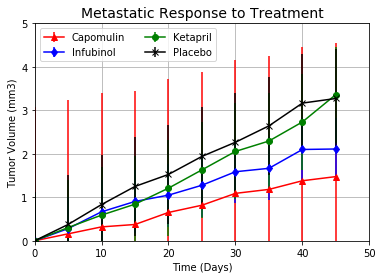

In [44]:
# Create Metastatic Response to treatment plot

y_axis = list(metastatic_pivot['Metastatic Sites']['Capomulin'].values)
x_axis = list(metastatic_pivot['Metastatic Sites']['Capomulin'].index)
Capomulin = plt.errorbar(x_axis,  y_axis, yerr=msec, marker="^", color='red', alpha=1.0)


y_axis = list(metastatic_pivot['Metastatic Sites']['Infubinol'].values)
x_axis = list(metastatic_pivot['Metastatic Sites']['Infubinol'].index)
Infubinol = plt.errorbar(x_axis,  y_axis, yerr=msei, marker="d",  color='blue', alpha=1.0)


y_axis = list(metastatic_pivot['Metastatic Sites']['Ketapril'].values)
x_axis = list(metastatic_pivot['Metastatic Sites']['Ketapril'].index)
Ketapril = plt.errorbar(x_axis,  y_axis, yerr=msek, marker="o",  color='green', alpha=1.0)


y_axis = list(metastatic_pivot['Metastatic Sites']['Placebo'].values)
x_axis = list(metastatic_pivot['Metastatic Sites']['Placebo'].index)
Placebo = plt.errorbar(x_axis,  y_axis, yerr=msep, marker="x",  color='black', alpha=1.0)

plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'),
           scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=10)



plt.xlabel("Time (Days)", fontsize=10, color='black')
plt.ylabel("Tumor Volume (mm3)", fontsize=10, color='black')
plt.title("Metastatic Response to Treatment", fontsize=14, color='black')
plt.grid()

      
plt.ylim(0, 5.0)
plt.xlim(0, 50.0)
plt.show()



## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint.
data_merge_by_drug['Mouse Count'] = data_merge.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
data_merge_by_drug.head()

Tumor Volume (mm3)  Metastatic Sites  Mouse Count
Drug      Timepoint                                                   
Capomulin 0                   45.000000          0.000000           25
          5                   44.266086          0.160000           25
          10                  43.084291          0.320000           25
          15                  42.064317          0.375000           24
          20                  40.716325          0.652174           23

In [23]:
# Covert into a pivot table
mouse_pivot = pd.pivot_table(data_merge_by_drug, values=['Mouse Count'], index=['Timepoint'], columns=['Drug'])
# Preview the data
mouse_pivot

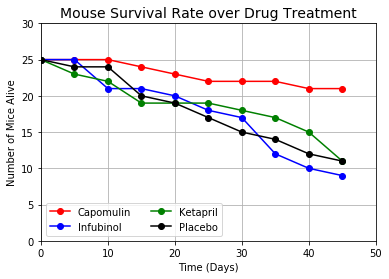

In [24]:
# Create mouse survival rate plot
y_axis = list(mouse_pivot['Mouse Count']['Capomulin'].values)
x_axis = list(mouse_pivot['Mouse Count']['Capomulin'].index)
Capomulin = plt.errorbar(x_axis,  y_axis, marker="o", color='red', alpha=1.0)


y_axis = list(mouse_pivot['Mouse Count']['Infubinol'].values)
x_axis = list(mouse_pivot['Mouse Count']['Infubinol'].index)
Infubinol = plt.errorbar(x_axis,  y_axis, marker="o",  color='blue', alpha=1.0)


y_axis = list(mouse_pivot['Mouse Count']['Ketapril'].values)
x_axis = list(mouse_pivot['Mouse Count']['Ketapril'].index)
Ketapril = plt.errorbar(x_axis,  y_axis, marker="o",  color='green', alpha=1.0)


y_axis = list(mouse_pivot['Mouse Count']['Placebo'].values)
x_axis = list(mouse_pivot['Mouse Count']['Placebo'].index)
Placebo = plt.errorbar(x_axis,  y_axis, marker="o",  color='black', alpha=1.0)



plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'),
           scatterpoints=1,
           loc='lower left',
           ncol=2,
           fontsize=10)



plt.xlabel("Time (Days)", fontsize=10, color='black')
plt.ylabel("Number of Mice Alive", fontsize=10, color='black')
plt.title("Mouse Survival Rate over Drug Treatment", fontsize=14, color='black')
plt.grid()   
plt.ylim(0, 30)
plt.xlim(0, 50.0)
plt.show()

## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
y_axis = []
y_axis.append(100*(drug_pivot['Tumor Volume (mm3)']['Capomulin'].iloc[-1] - drug_pivot['Tumor Volume (mm3)']['Capomulin'].iloc[0])/drug_pivot['Tumor Volume (mm3)']['Capomulin'].iloc[0])
y_axis.append(100*(drug_pivot['Tumor Volume (mm3)']['Infubinol'].iloc[-1] - drug_pivot['Tumor Volume (mm3)']['Infubinol'].iloc[0])/drug_pivot['Tumor Volume (mm3)']['Capomulin'].iloc[0])
y_axis.append(100*(drug_pivot['Tumor Volume (mm3)']['Ketapril'].iloc[-1] - drug_pivot['Tumor Volume (mm3)']['Ketapril'].iloc[0])/drug_pivot['Tumor Volume (mm3)']['Capomulin'].iloc[0])
y_axis.append(100*(drug_pivot['Tumor Volume (mm3)']['Placebo'].iloc[-1] - drug_pivot['Tumor Volume (mm3)']['Placebo'].iloc[0])/drug_pivot['Tumor Volume (mm3)']['Capomulin'].iloc[0])

x_axis = [0,1,2,3]
x=0
print(y_axis)

[-19.475302667894173, 46.12347172785188, 57.028794686606076, 51.29796048315153]


AttributeError: module 'matplotlib.pyplot' has no attribute 'hline'

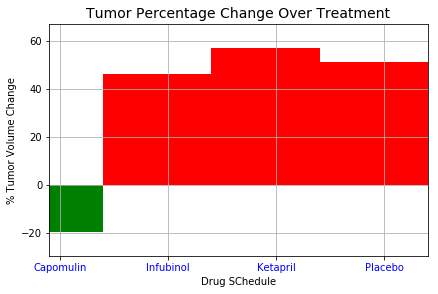

In [28]:

# Plot Bar chart

plt.bar(0, y_axis[0], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(1, y_axis[1], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(2, y_axis[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, y_axis[3], facecolor='red', alpha=1.0, align="center",width=1.0)
tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"], fontsize=10, color='blue')


plt.xlim(0, 3.5)
plt.ylim(min(y_axis)-10, max(y_axis)+10)
plt.title("Tumor Percentage Change Over Treatment", fontsize=14, color='black')
plt.xlabel("Drug SChedule", fontsize=10, color='black')
plt.ylabel("% Tumor Volume Change", fontsize=10, color='black')
plt.tight_layout(pad=0.4, w_pad=0.01, h_pad=1.0)
plt.grid()
plt.hline(0,0,3,alpha=0.6)
plt.show()
